Step1: Extract file name

Step2: Extract image width & height

Step3: Extract bounding box ccordinates

Step4: 

Step5: 

Step6: 

Step7: 

Step8: 


### Person: 1088
### Package: 374
### Dog: 25

In [103]:
import pandas as pd
import json
import ast

In [104]:
data = pd.read_csv('poter.csv')

In [105]:
data.columns

Index(['image', 'id', 'rect', 'labels', 'annotator', 'annotation_id',
       'created_at', 'updated_at', 'lead_time'],
      dtype='object')

In [106]:
# Step1 file_name extract

file_names = data['image']
file_names

0                    gs://input-bucket-2e42ed/frame_4.jpg
1                  gs://input-bucket-2e42ed/frame_382.jpg
2                  gs://input-bucket-2e42ed/frame_381.jpg
3                  gs://input-bucket-2e42ed/frame_380.jpg
4                  gs://input-bucket-2e42ed/frame_379.jpg
                              ...                        
1092    gs://input-bucket-2e42ed/POTER_HOME-POTER_HOME...
1093    gs://input-bucket-2e42ed/POTER_HOME-POTER_HOME...
1094    gs://input-bucket-2e42ed/POTER_HOME-POTER_HOME...
1095    gs://input-bucket-2e42ed/POTER_HOME-POTER_HOME...
1096    gs://input-bucket-2e42ed/POTER_HOME-POTER_HOME...
Name: image, Length: 1097, dtype: object

In [107]:
#creating dictionary

json_data = {'categories' : [], 'images' : [], 'annotations' : []}
json_data

{'categories': [], 'images': [], 'annotations': []}

In [108]:
#appending classes as required

index_0 = {"id": 0, "name": "Person"}
index_1 = {"id": 1, "name": "Package"}
index_2 = {"id": 2, "name": "Dog"}

json_data['categories'].append(index_0)
json_data['categories'].append(index_1)
json_data['categories'].append(index_2)

json_data['categories']

[{'id': 0, 'name': 'Person'},
 {'id': 1, 'name': 'Package'},
 {'id': 2, 'name': 'Dog'}]

In [109]:
# for info in range(len(data['labels'])):
#     image_info = ast.literal_eval(data['labels'][info])      
#     image_info_labels = len(image_info)                                    # to check the no. of annotations present inside json
#     for anno in range(image_info_labels):
#         # print("=============================",image_info[anno])
#         try:
#             file_name = data['image'][info]
#             x_min = image_info[anno]['x']
#             y_min = image_info[anno]['y']
#             x_max = image_info[anno]['width']
#             y_max = image_info[anno]['height']
#             width = image_info[anno]['original_width']
#             height = image_info[anno]['original_height']
#             labels = image_info[anno]['labels'][0]
#             # print(file_name)
#             # print(x_min, y_min, x_max, y_max, width, height, labels)
            
#         except:
#             # print(f"Annotaion for label {image_info[anno]['labels'][0]} not present")
#             pass

In [110]:
temp_image_id = 0
image_id = 0
for info in range(len(data['labels'])):
    
    image_info = ast.literal_eval(data['labels'][info])      
    image_info_labels = len(image_info)                                    # to check the no. of annotations present inside json
    for anno in range(image_info_labels):
        # print(anno)
        # print("=============================",image_info[anno])
        try:
            file_name = data['image'][info]
            x_min = image_info[anno]['x']
            y_min = image_info[anno]['y']
            x_max = image_info[anno]['width']
            y_max = image_info[anno]['height']
            image_width = image_info[anno]['original_width']
            image_height = image_info[anno]['original_height']
            labels = image_info[anno]['labels'][0]
            # print(labels)
            
            if labels == 'Person':
                category_id = 0
            elif labels == 'Package':
                category_id = 1
            elif labels == 'Dog':
                category_id = 2
                
            # print(file_name)
            print(x_min, y_min, x_max, y_max, image_width, image_height, labels)
            # image_id = image_id+1
            
            json_data['images'].append({'file_name': file_name.split('/')[-1],
                                'height': image_height, 
                                'width': image_width, 
                                'id': image_id})
            
            json_data['annotations'].append({'area': int(x_max)*int(y_max),
                                        'iscrowd': 0,
                                        'image_id': image_id,
                                        'bbox': [int((x_min/100)*image_width), int((y_min/100)*image_height), int((x_max/100)*image_width), int((y_max/100)*image_height)],
                                        'category_id': category_id,
                                        'id': temp_image_id,
                                        'ignore': 0,
                                        'segmentation': []})
            
            
            
            
            temp_image_id = temp_image_id+1
            image_id = image_id+1
        except:
            # print(f"Annotaion for label {image_info[anno]['labels'][0]} not present")
            pass
        # temp_image_id = temp_image_id+1

54.25236905285802 0 8.36885966921684 35.17397308776514 2304 1296 Person
71.33333333333317 65.4028436018957 24.93333333333335 34.597156398104225 2304 1296 Person
59.733333333333356 78.4360189573458 21.33333333333324 21.563981042653978 2304 1296 Person
58.38245584235881 78.47654338226646 18.9526398333207 21.29448367499153 2304 1296 Person
72.81930423524916 92.82551446075523 6.157897418768475 7.174485539244556 2304 1296 Package
56.032986111111114 70.83333333333336 21.70138888888889 28.780864197530864 2304 1296 Person
51.509276771540364 61.74418388735075 19.78669282815175 38.25581611264925 2304 1296 Person
55.649659631627536 59.69896910286632 24.58848439314251 40.301030897132854 2304 1296 Person
50.367688910138 75.0748644250659 14.115611410878206 24.92513557493368 2304 1296 Package
57.19782346378854 61.964890518769685 23.677799785988945 38.03510948123008 2304 1296 Person
49.82127814584569 75.39856748448064 15.299501400177345 24.601432515518713 2304 1296 Package
57.24337756362907 62.0384593

In [111]:
with open("sample.json", "w") as outfile:
    json.dump(json_data, outfile, indent=1)

# Visualization

In [112]:
from pycocotools.coco import COCO
import layoutparser as lp
import random
import cv2

In [113]:
def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )

    return layout

In [114]:
COCO_ANNO_PATH = 'sample.json'
COCO_IMG_PATH  = 'images'

coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


POTER_HOME-POTER_HOME_ENTRANCE-1666892111.avi-frame15.jpg


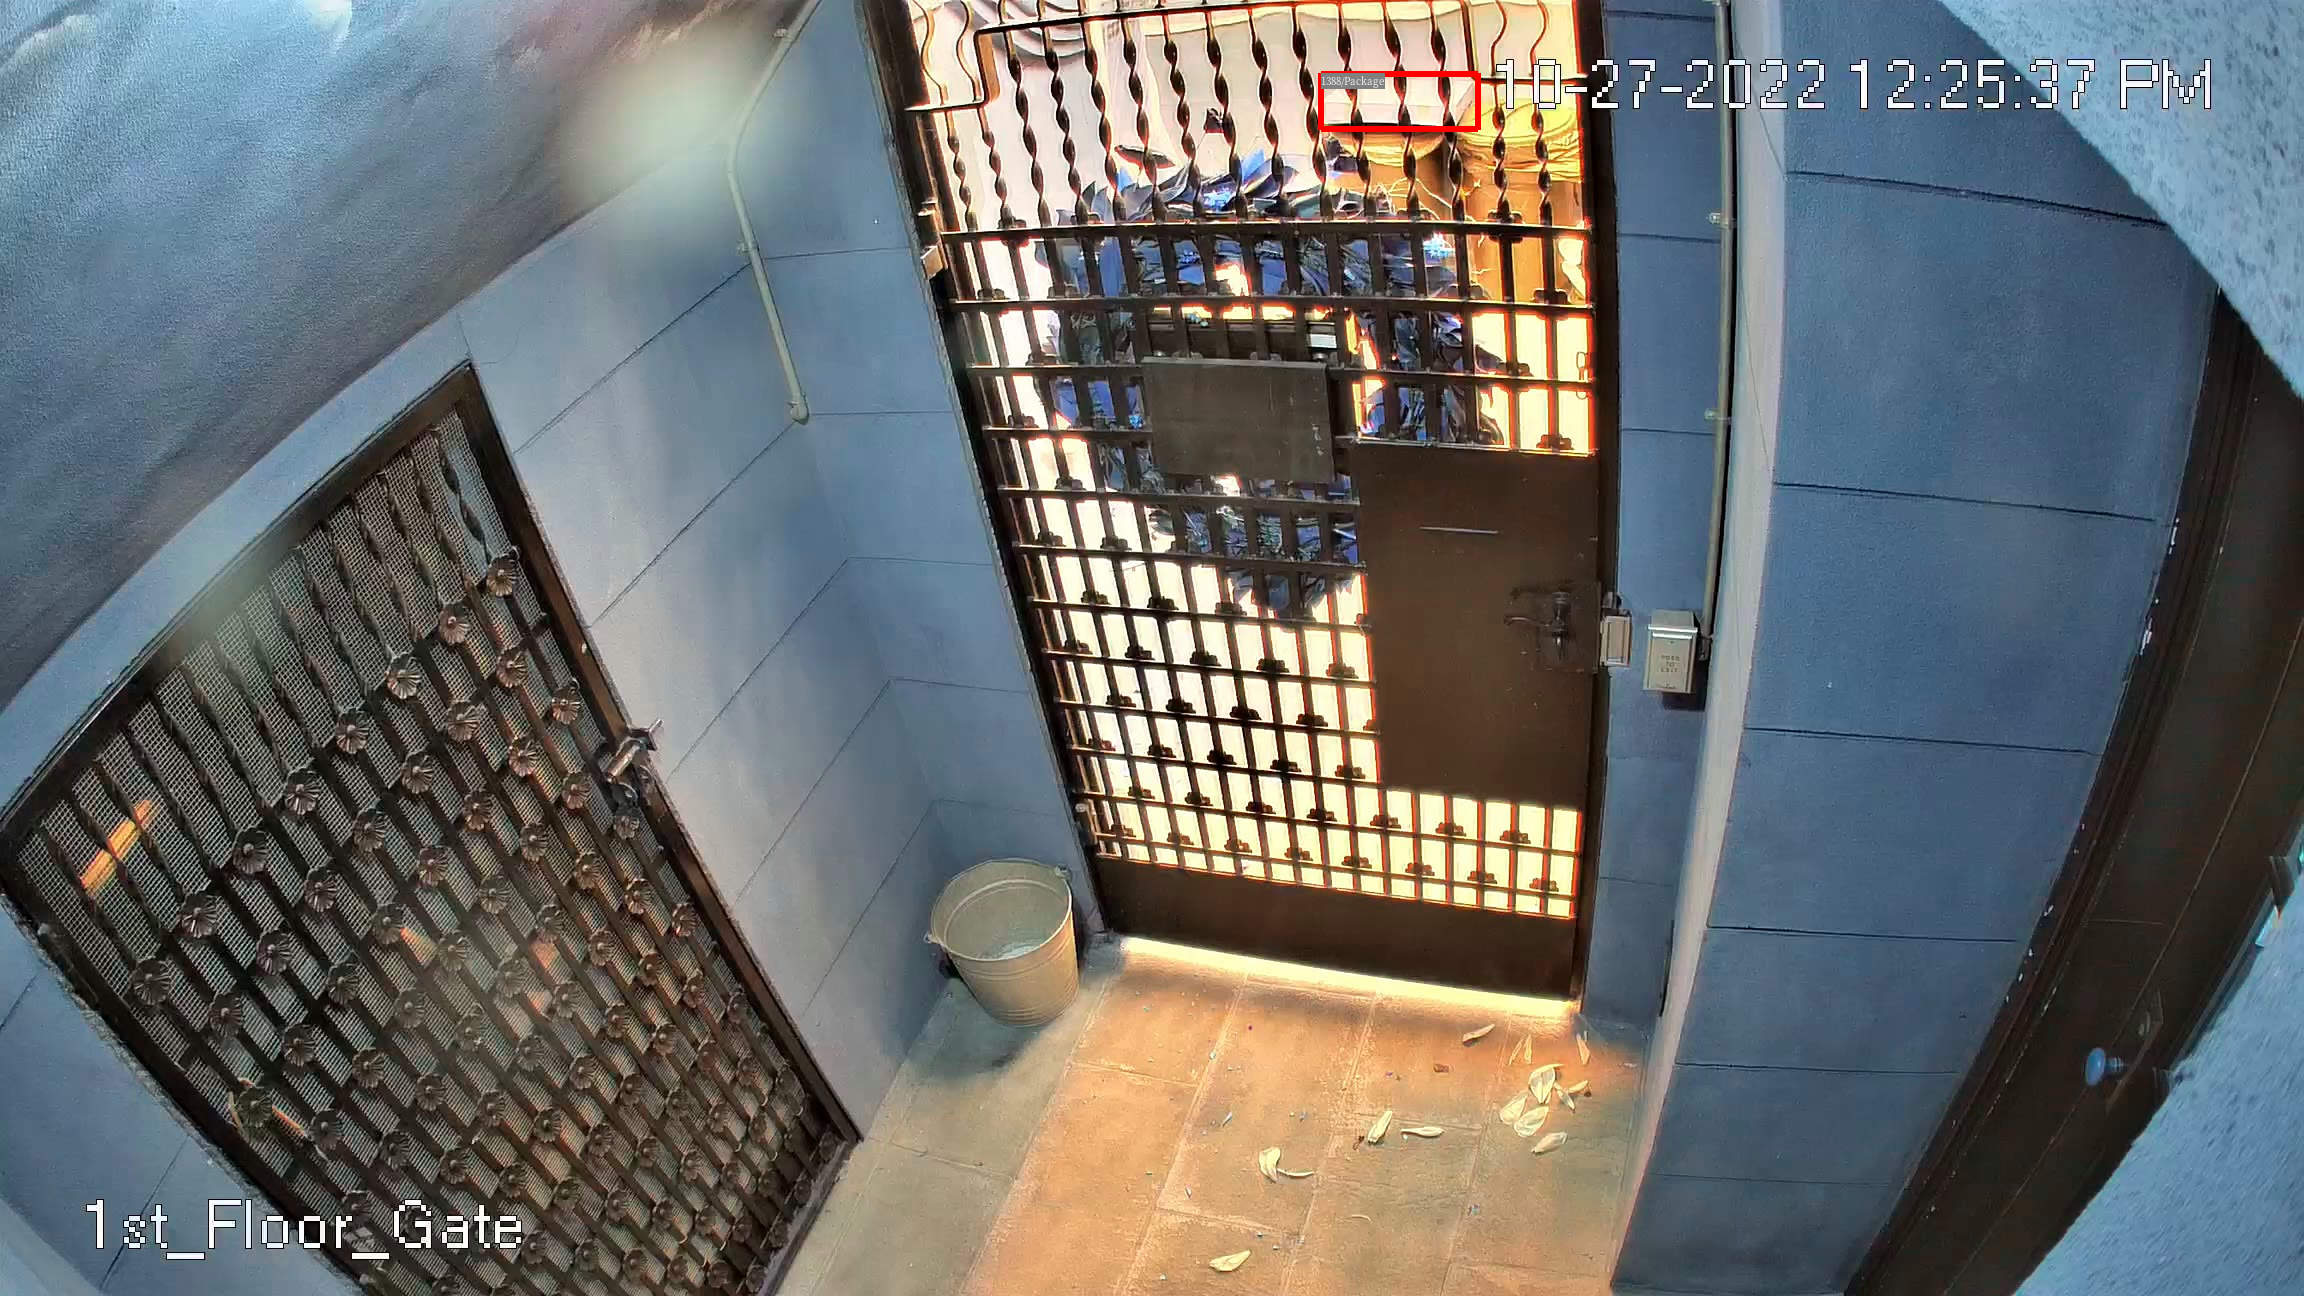

In [129]:

color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}


for image_id in random.sample(coco.imgs.keys(), 1):
    image_info = coco.imgs[image_id]
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))

    image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
    print(image_info["file_name"])
    layout = load_coco_annotations(annotations, coco)

    # viz = lp.draw_box(image, layout, color_map=color_map)
    
    
    viz = lp.draw_box(image,
              [b.set(id=f'{b.id}/{b.type}') for b in layout],
              color_map=color_map,
              show_element_id=True, id_font_size=10,
              id_text_background_color='grey',
              id_text_color='white')

    display(viz) # show the results